[[ 1. -1.]
 [-1.  1.]]


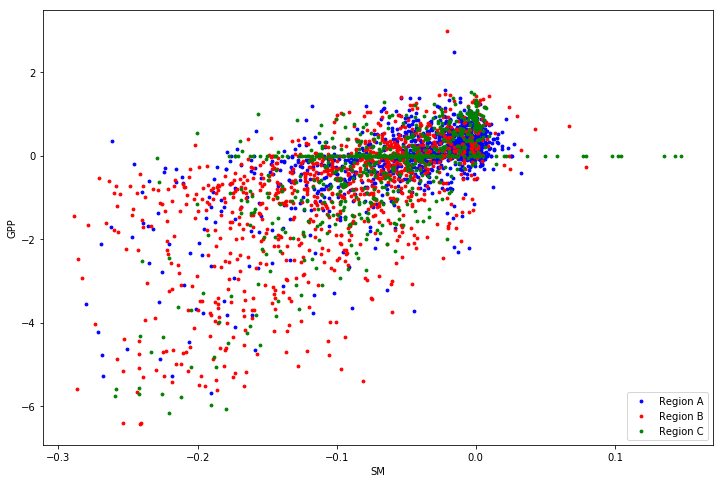

(388800,)


In [46]:
import datetime
import numpy as np
import pandas as pd
import os,sys
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
from datetime import timedelta

# Load Soil Moisture data
# Data comes from file /scratch/shared/lars/PCRGLOBWB/MSWEP_full_series/anomaly/anomaly.nc on cartesius
SM_path='/Users/killaars/PhD/Elnino/sibcasa/'
SM_anomaly_fh = nc.Dataset(os.path.join(SM_path,'reg1_soil_moisture_anomaly.nc'),mode='r')
SM_data1=SM_anomaly_fh.variables['lower_soil_storage'][189:195,:,:]
SM_data1=SM_data1.ravel()
SM_anomaly_fh = nc.Dataset(os.path.join(SM_path,'reg2_soil_moisture_anomaly.nc'),mode='r')
SM_data2=SM_anomaly_fh.variables['lower_soil_storage'][189:195,:,:]
SM_data2=SM_data2.ravel()
SM_anomaly_fh = nc.Dataset(os.path.join(SM_path,'reg3_soil_moisture_anomaly.nc'),mode='r')
SM_data3=SM_anomaly_fh.variables['lower_soil_storage'][189:195,:,:]
SM_data3=SM_data3.ravel()
# 

# Load GPP data
GPP_path='/Users/killaars/PhD/Elnino/sibcasa/'
GPP_anomaly_fh = nc.Dataset(os.path.join(GPP_path,'reg1_gpp_anomaly.nc'),mode='r')
GPP_data1=GPP_anomaly_fh.variables['GPP'][189:195,:,:]
GPP_data1=GPP_data1.ravel()
GPP_anomaly_fh = nc.Dataset(os.path.join(GPP_path,'reg2_gpp_anomaly.nc'),mode='r')
GPP_data2=GPP_anomaly_fh.variables['GPP'][189:195,:,:]
GPP_data2=GPP_data2.ravel()
GPP_anomaly_fh = nc.Dataset(os.path.join(GPP_path,'reg3_gpp_anomaly.nc'),mode='r')
GPP_data3=GPP_anomaly_fh.variables['GPP'][189:195,:,:]
GPP_data3=GPP_data3.ravel()

print(np.corrcoef(SM_data2,GPP_data2))

fig = plt.figure(figsize=[12,8])
#fig.suptitle('Soil moisture storage anomaly (m) for the ENSO event of 2015/2016',fontsize='20')#, y=0.65) #y to fix the y-position, otherwise title would float.
gs = GridSpec(1,1,width_ratios=[1],height_ratios=[1])
gs.update(wspace=0,hspace=0.0)


s=8
plt.scatter(SM_data1,GPP_data1,c='b',s=s,label='Region A')
plt.scatter(SM_data2,GPP_data2,c='r',s=s,label='Region B')
plt.scatter(SM_data3,GPP_data3,c='g',s=s,label='Region C')
plt.xlabel("SM")
plt.ylabel("GPP")
plt.legend(loc='lower right')
plt.show()

# Mean temporal correlation for each regio:
# A = 0.26
# B = 0.54
# C = 0.47
# Zegt eigenlijk vrij weinig, aangezien alle regios een deel in de anomaly hotspot hebben. Eigenlijk is de regioverdeling  
# niet de meest nuttige. 
print(np.shape(SM_data))

In [13]:
# -- Load Amazon mask
g = nc.Dataset('/Users/killaars/PhD/Elnino/Figures_paper/amazon_mask30_SA.nc')
amazon = g.variables['regionmask'][:] # -
g.close()

# -- Koppen climate regions
q = nc.Dataset('/Users/killaars/PhD/Elnino/Figures_paper/koppen_regions_30_SA.nc')
koppen = q.variables['regionmask'][:] # -
q.close()

koppen=np.around(koppen)

# ==== CONSTRUCT MASK

# -- Reverse latitudes
amazon = amazon[::-1,:]
koppen = koppen[::-1,:]

# -- Select Amazon regions
rainforest_amazon = amazon*(koppen==1)
monsoon_amazon = amazon*(koppen==2)
savanna_amazon = amazon*(koppen==3)

np.shape(rainforest_amazon)


(100, 120)

[ True  True  True ...,  True  True  True]


/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


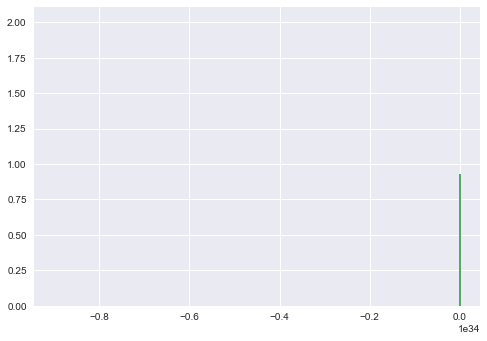

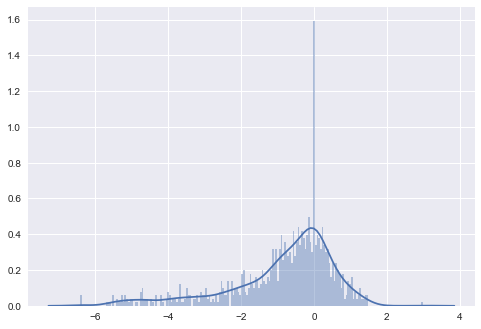

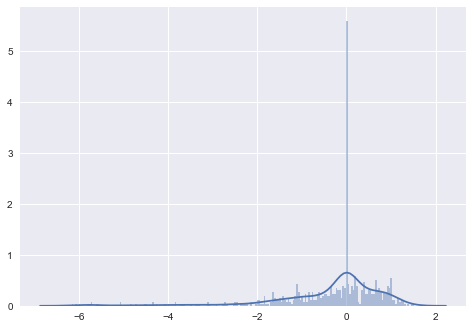

In [69]:
import numpy.ma as ma
import seaborn as sns

print(ma.getmask(GPP_data3))
test=GPP_data3[~ma.getmask(GPP_data3)]
unique, counts = np.unique(test, return_counts=True)
#print(dict(zip(unique, counts)))

hist = GPP_data1[~ma.getmask(GPP_data1)]
sns.distplot( hist, bins=200 )
plt.show()
hist = GPP_data2[~ma.getmask(GPP_data2)]
sns.distplot( hist, bins=200 )
plt.show()
hist = GPP_data3[~ma.getmask(GPP_data3)]
sns.distplot( hist, bins=200 )
plt.show()
